**<h1>Image Restoration**

In this project we aim to restore old ,damaged images(having fold lines,etc) using OpenCV methods.
We will first upload the images and make it undergo denoising to get rid of the noise. Then we'll process it further to obtain our final image.



**<h2> Importing Libraries**

1) Numpy:Fundamental library for scientific computing in python.

2) CV2: It is the openCV library containing the required algorithms which can be implemented on the images.

3) Matplotlib:t is the plotting library for python and is usually used for data visualization

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow as show

**<h2>Uploading Image**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving imgres.jpg to imgres.jpg


In [ ]:
name=str(list(uploaded.keys())[0])
print(name)

imgres.jpg


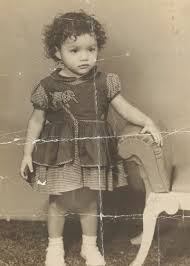

In [ ]:
img=cv.imread(name)
show(img)


**<h2> Denoising the image**

Denoising,as the name suggests, helps in removing the noise from the dataset.
There is a property of noise. Noise is generally considered to be a random variable with zero mean. Consider a noisy pixel, p=p0+n where p0 is the true value of pixel and n is the noise in that pixel. You can take large number of same pixels (say N) from different images and computes their average. Ideally, you should get p=p0 since mean of noise is zero.
The above concept is used by opencv to denoise the image.

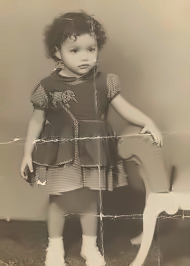

In [ ]:
img_denoise = cv.fastNlMeansDenoisingColored(img, None, 6, 10, 7, 15)
show(img_denoise)

In [ ]:
img_denoise.shape==img.shape

True

**<h2>Grayscaling Image**

Converting image to grayscale.

In [ ]:
gray=cv.cvtColor(img_denoise,cv.COLOR_BGR2GRAY)

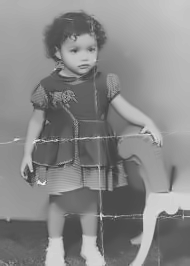

In [ ]:
show(gray)

**<h2>Uploading mask image**

A mask image is an image with the features which need to be repaired,highlighted using MSPaint tool.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving masked.png to masked.png


In [ ]:
dst=str(list(uploaded.keys())[0])
print(dst)

masked.png


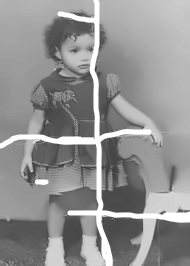

In [ ]:
mask=cv.imread(dst,0)
show(mask)

In the above image, we need to get rid of the the folds which here have been highlighted using MSPaint.

In [ ]:
mask.shape==gray.shape

True

**<h2> Thresholding Image to Binary**

If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is cv2.threshold. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. 

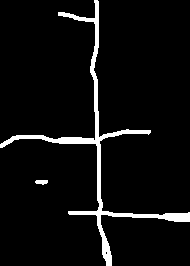

In [ ]:
ret, thresh1 = cv.threshold(mask, 240, 255, cv.THRESH_BINARY)
show(thresh1)


In [ ]:
thresh1.shape

(266, 190)

**<h2> Dilation**

This operations consists of convoluting an image A with some kernel (B), which can have any shape or size, usually a square or circle.The kernel B has a defined anchor point, usually being the center of the kernel.As the kernel B is scanned over the image, we compute the maximal pixel value overlapped by B and replace the image pixel in the anchor point position with that maximal value. As you can deduce, this maximizing operation causes bright regions within an image to “grow” (therefore the name dilation). Take as an example the image above.

In [ ]:
kernel = np.ones((5,5), np.uint8) 

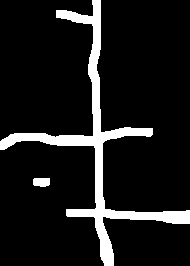

In [ ]:
img_dilation = cv.dilate(thresh1, kernel, iterations=1) 
show(img_dilation)

In [ ]:
img_dilation.shape==img.shape

False

In [ ]:
print(img_dilation.shape)

(266, 190)


In [ ]:
print(img.shape)

(266, 190, 3)


**<H2>Image Inpainting**

Image inpainting is a class of algorithms in computer vision where the objective is to fill regions inside an image or a video.

The region is identified using a binary mask, and the filling is usually done by propagating information from the boundary of the region that needs to be filled.

The most common application of image inpainting is restoration of old scanned photos. It is also used for removing small unwanted objects in an image.

In [ ]:
final = cv.inpaint(img,img_dilation,3,cv.INPAINT_TELEA)

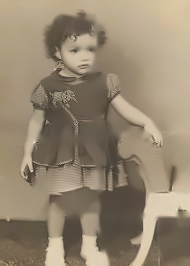

In [ ]:
final_denoise=cv.fastNlMeansDenoisingColored(final, None, 6, 10, 7, 15)
show(final_denoise)

**<h2>Results**

After Restoration:


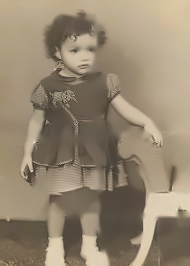

Before Restoration:


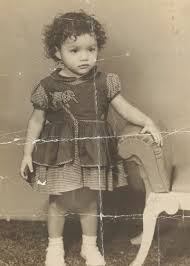

In [ ]:
print("After Restoration:")
show(final_denoise)
print("Before Restoration:")
show(img)

**<h2> Summary**

Using openCV and following the above steps, we were succesfully able to restore the old image.